In [2]:
import pandas as pd

In [3]:
raw_data=pd.read_csv('C:\\rawData\\개인형 이동장치 수입현황(2019년~2022년 5월, 단위 백만달러).csv',encoding='cp949')

In [4]:
raw_data.columns=["종류","비고","2019년","2020년","2021년","2022년 1~5월"]

In [5]:
raw_data

,종류,비고,2019년,2020년,2021년,2022년 1~5월
0,개인형 이동장치,금액,89.9,131.7,193.7,65.0
1,개인형 이동장치,증감률,25.4,46.5,47.0,33.3
2,개인형 이동장치,비중,100.0,100.0,100.0,100.0
3,전동킥보드,금액,61.0,89.2,111.6,33.9
4,전동킥보드,증감률,7.2,46.2,25.1,45.8
5,전동킥보드,비중,67.9,67.7,57.6,52.1
6,전기자전거,금액,28.9,42.5,82.0,31.1
7,전기자전거,증감률,95.4,47.2,93.0,11.0
8,전기자전거,비중,32.1,32.3,42.4,47.9


In [6]:
pm_data_금액=raw_data[raw_data['비고']=="금액"]
pm_data_금액=pm_data_금액[["종류","2019년","2020년","2021년"]]

In [7]:
# 참고 : 단위는 백만달러
pm_data_금액

,종류,2019년,2020년,2021년
0,개인형 이동장치,89.9,131.7,193.7
3,전동킥보드,61.0,89.2,111.6
6,전기자전거,28.9,42.5,82.0


In [8]:
pm_data_비중=raw_data[raw_data['비고']=="비중"]
pm_data_비중=pm_data_비중[["종류","2019년","2020년","2021년","2022년 1~5월"]]

In [9]:
# 참고 : 단위는 백만달러
pm_data_비중

,종류,2019년,2020년,2021년,2022년 1~5월
2,개인형 이동장치,100.0,100.0,100.0,100.0
5,전동킥보드,67.9,67.7,57.6,52.1
8,전기자전거,32.1,32.3,42.4,47.9


In [10]:
pm_data_금액.T

,0,3,6
종류,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [11]:
pm_transpose=pm_data_금액.T

In [12]:
pm_transpose

,0,3,6
종류,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [13]:
pm_transpose.columns=["개인형 이동장치", "전동킥보드", "전기자전거"]

In [14]:
pm_transpose=pm_transpose[1:4]

In [15]:
pm_transpose

,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [16]:
pm = pm_transpose
pm

,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [17]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot: >

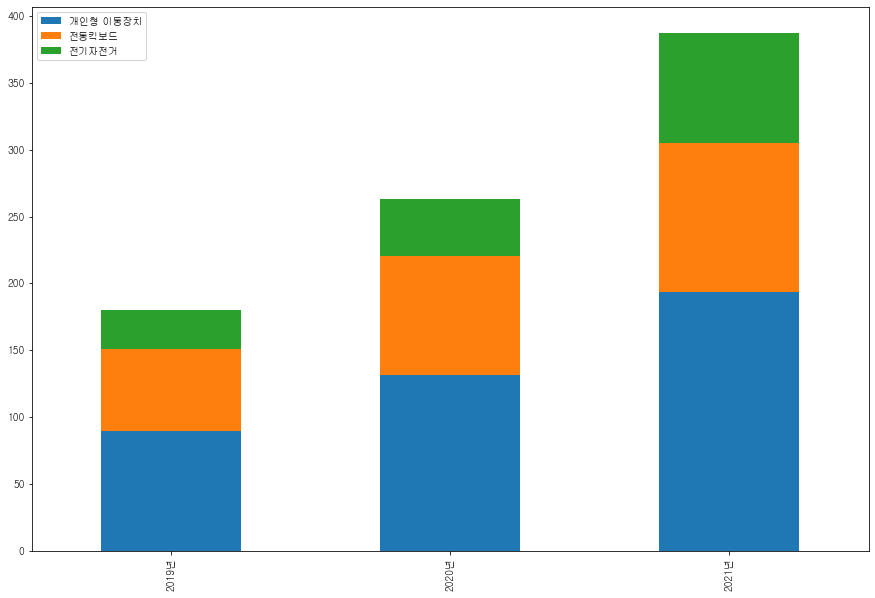

In [18]:
import pandas as pd
pm_transpose.plot(kind="bar",figsize=(15,10),stacked=True)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pm.index=['2019','2020','2021']
pm

,개인형 이동장치,전동킥보드,전기자전거
2019,89.9,61.0,28.9
2020,131.7,89.2,42.5
2021,193.7,111.6,82.0


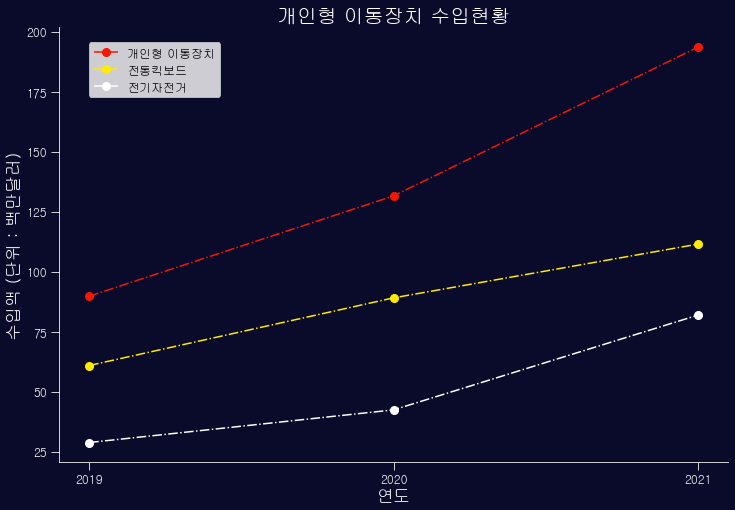

In [21]:
fig, ax = plt.subplots(1,1,figsize = (12,8))

plt.title('개인형 이동장치 수입현황',  fontsize=20, color='white')
plt.ylabel('수입액 (단위 : 백만달러)', fontsize=17, color='white')
plt.xlabel('연도', fontsize=17, color='white')

plt.plot(pm['개인형 이동장치'], color='#F51702', linestyle='-.', marker='o', markersize=8)
plt.plot(pm['전동킥보드'], color='#FFEC00', linestyle='-.', marker='o', markersize=8)
plt.plot(pm['전기자전거'], color='white', linestyle='-.', marker='o', markersize=8)

ax.tick_params(axis='x', colors='white', grid_color='white', length=8, labelsize=12)
ax.tick_params(axis='y', colors='white', grid_color='white', length=8, labelsize=12)

ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["bottom"].set_color('w')
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["left"].set_color('w')

ax.legend(pm.columns.tolist(), fontsize='large', bbox_to_anchor=(0.25,0.98))
fig.patch.set_facecolor('#0A0A2A')
ax.set_facecolor('#0A0A2A')

plt.show()


In [39]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.ticker as ticker

labels = ['전기자전거', '전동킥보드', '개인형 이동장치']
colors = ['#69665B', '#E8D684', '#B5A767']

mode_size = [8, 8, 8]
line_size = [2, 2, 2]

x_data = np.vstack((np.arange(2019, 2022),)*3)
y_data = np.array([
    [28.9,42.5,82.0],
    [61.0,89.2,111.6],
    [89.9,131.7,193.7],
])

In [71]:
fig = go.Figure()
for i in range(0, 3):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
                            ))

    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))
    
fig.update_xaxes(dtick=1)
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='#f2f2f2',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='#f2f2f2'
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=160,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='#080808',
    paper_bgcolor='#080808'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {:.1f}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color = '#f2f2f2'),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[2],
                                  xanchor='left', yanchor='middle',
                                  text='{:.1f}'.format(y_trace[2]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color = '#f2f2f2'),
                                  showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.025, y=1.25,
                              xanchor='left', yanchor='top',
                              text='<개인형 이동장치 수입 현황>',
                              font=dict(family='Arial',
                                        size=25,
                                        color='#f2f2f2'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.2,
                              xanchor='center', yanchor='bottom',
                              text='단위 : 백만달러 ',
                              font=dict(family='Arial',
                                        size=15,
                                        color='#f2f2f2'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

In [25]:
pm_data_개인=pm_data_금액.query('종류=="개인형 이동장치"')

In [26]:
pm_data_개인

,종류,2019년,2020년,2021년
0,개인형 이동장치,89.9,131.7,193.7
